<a href="https://colab.research.google.com/github/AkulaAnshul/AIML/blob/main/AIML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [59]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart (1).csv


In [60]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [61]:
data.shape

(1025, 14)

In [62]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [63]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [64]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,No,1.0,0,2,normal,No_disease
1,53,Male,0,140,203,1,0,155,Yes,3.1,0,0,normal,No_disease
2,70,Male,0,145,174,0,1,125,Yes,2.6,0,0,normal,No_disease
3,61,Male,0,148,203,0,1,161,No,0.0,0,1,normal,No_disease
4,62,Female,0,138,294,1,1,106,No,1.9,0,3,reversable_defect,No_disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

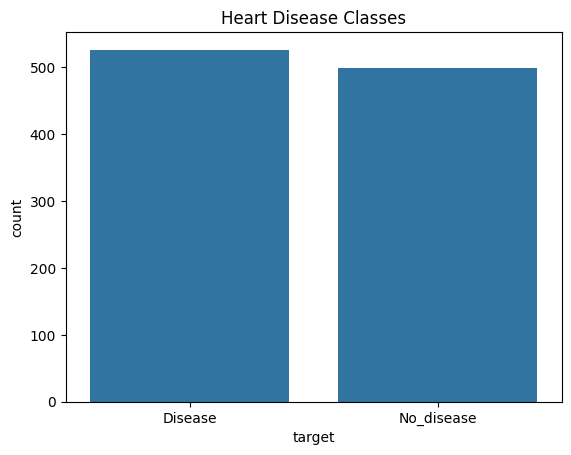

In [65]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

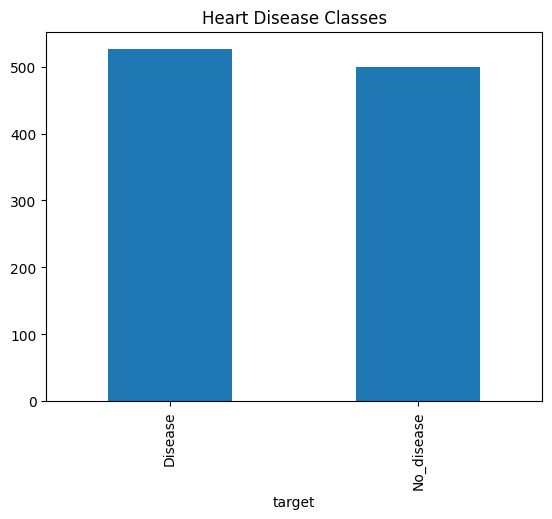

In [66]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

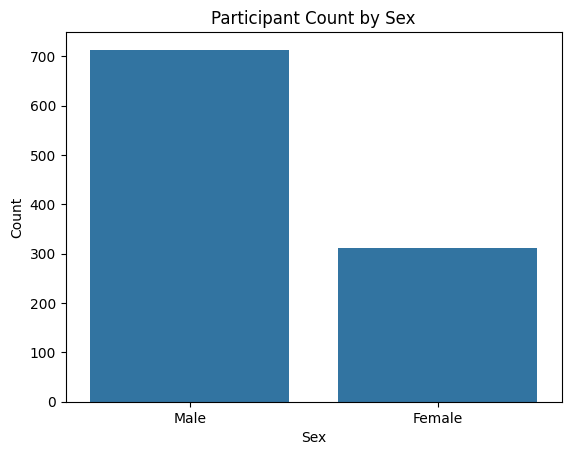

In [67]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
sns.barplot(x=data['sex'].value_counts().index, y=data['sex'].value_counts().values)
plt.title('Participant Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


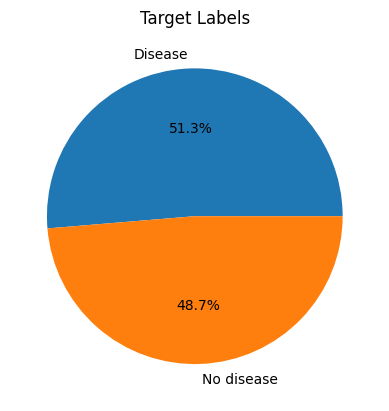

In [68]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

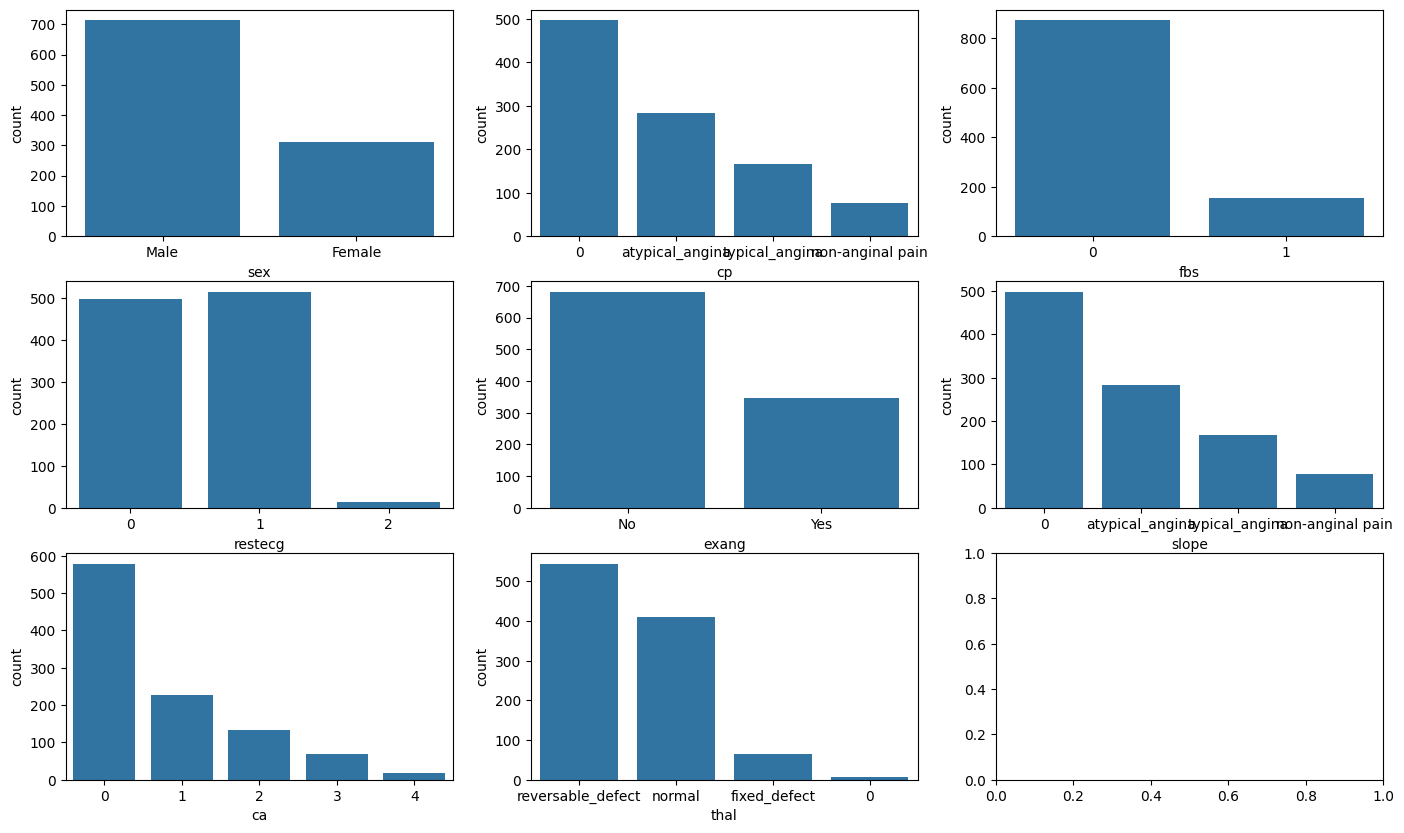

In [69]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

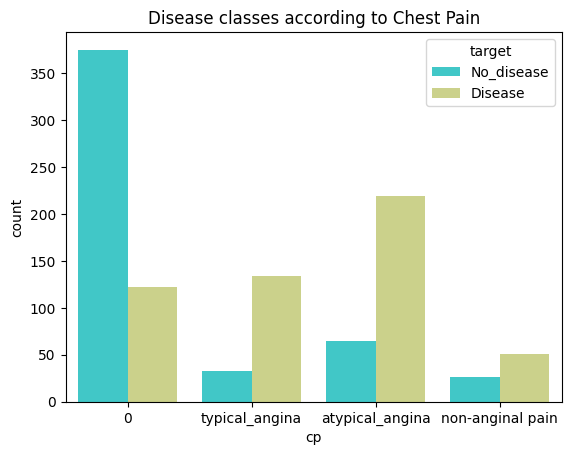

In [70]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

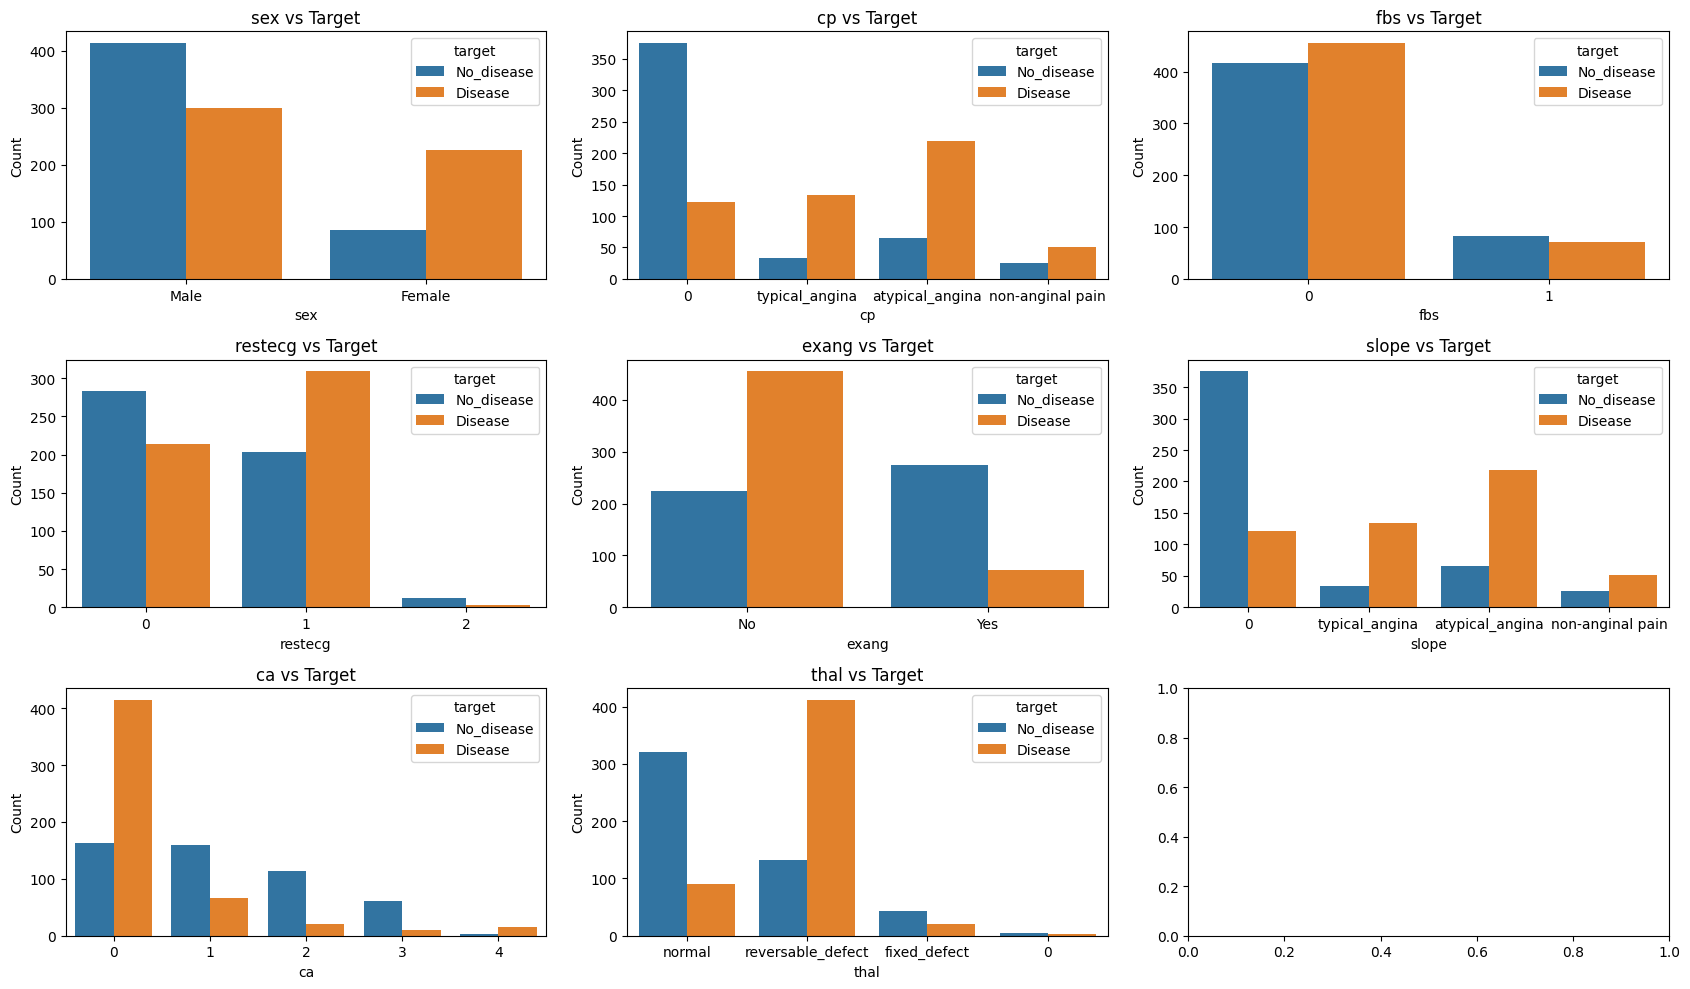

In [71]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do
    sns.countplot(x=feature, hue="target", data=data, ax=ax)
    ax.set_title(f'{feature} vs Target')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Visualising the distribution of the continous variables

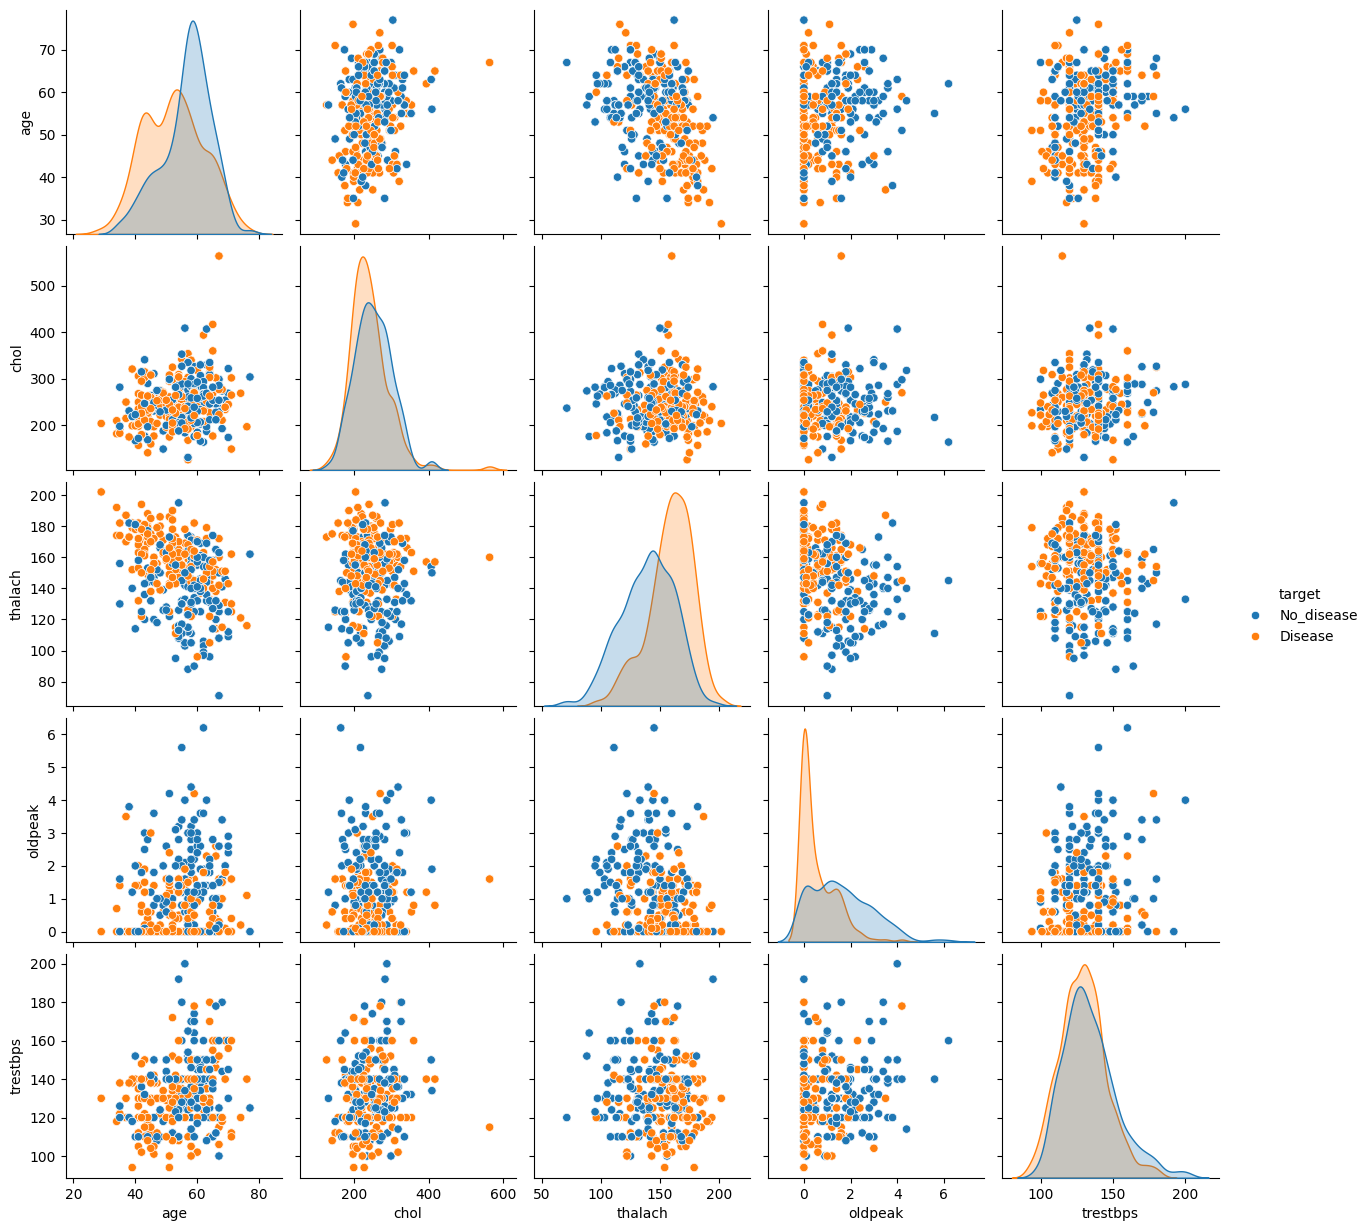

In [17]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

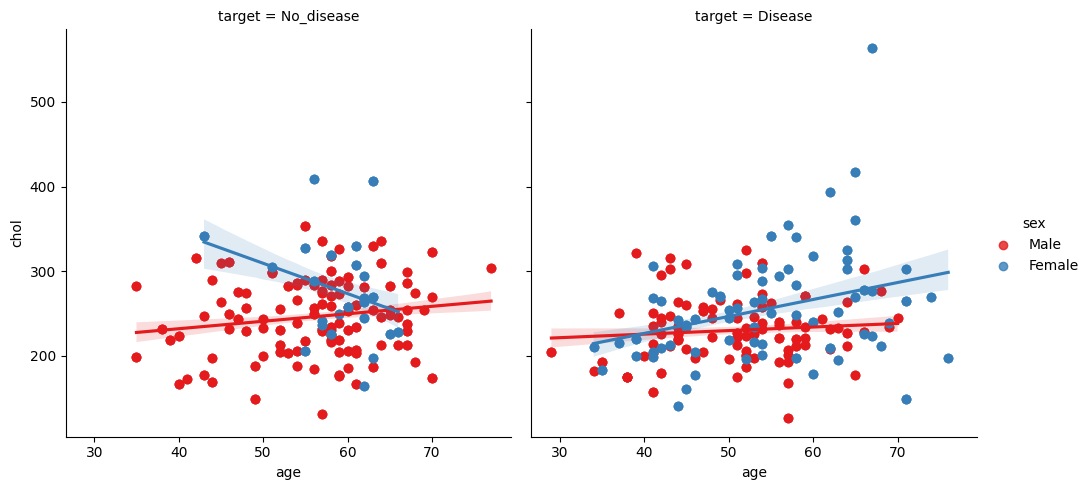

In [19]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

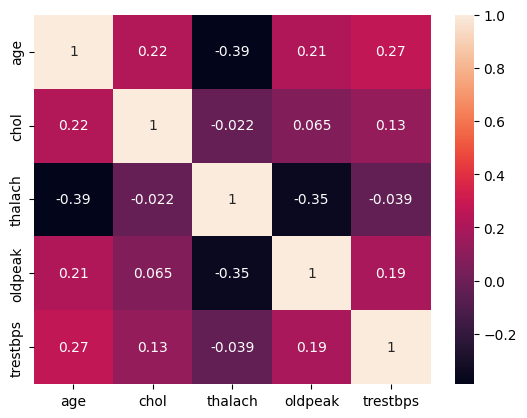

In [20]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

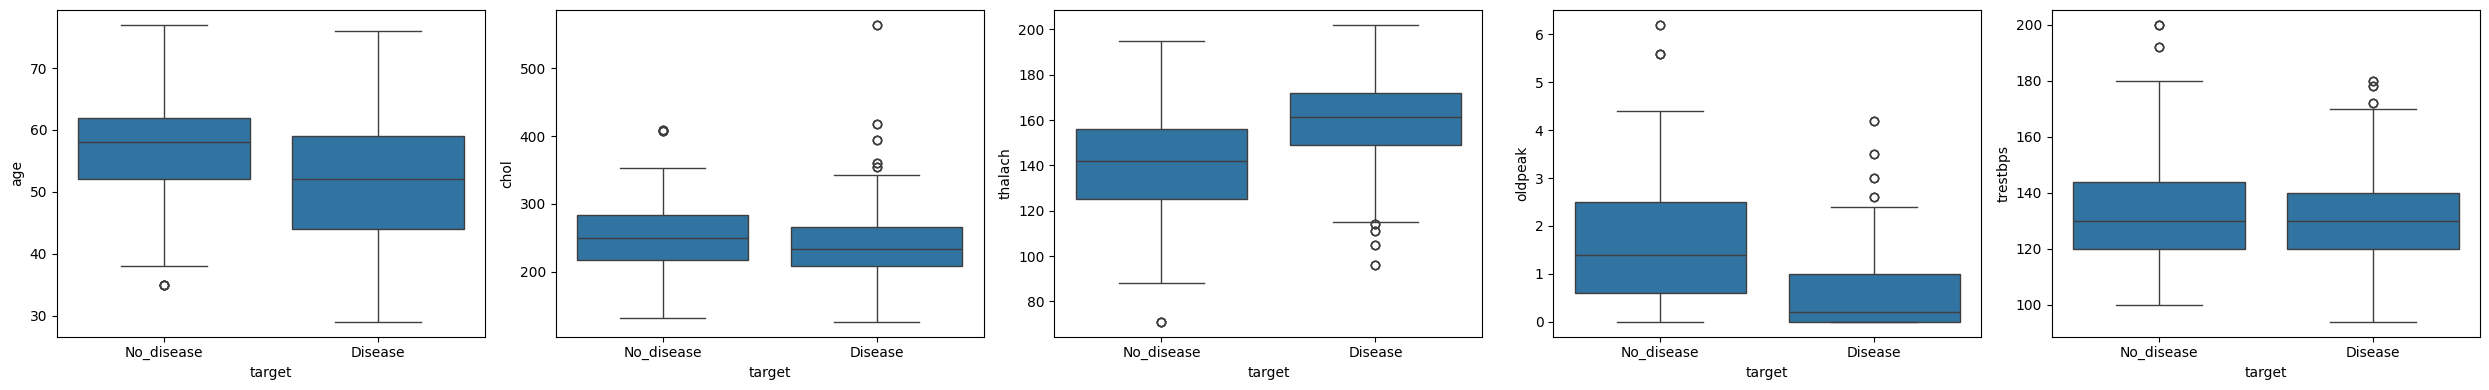

In [21]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

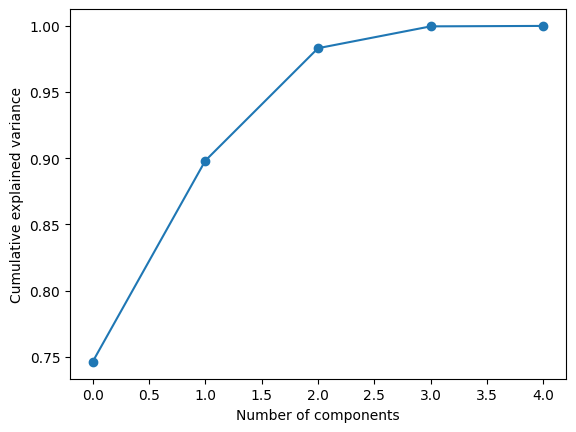

In [23]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

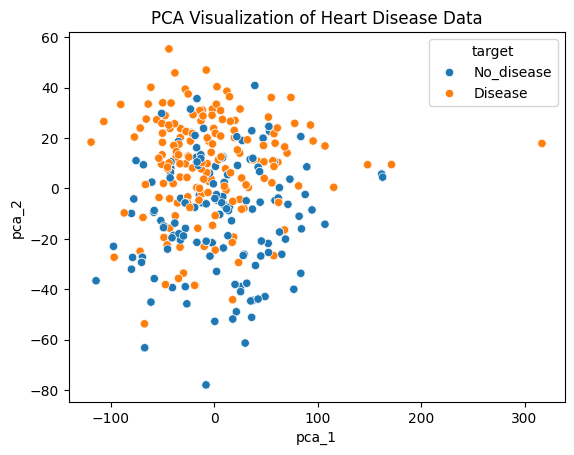

In [24]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


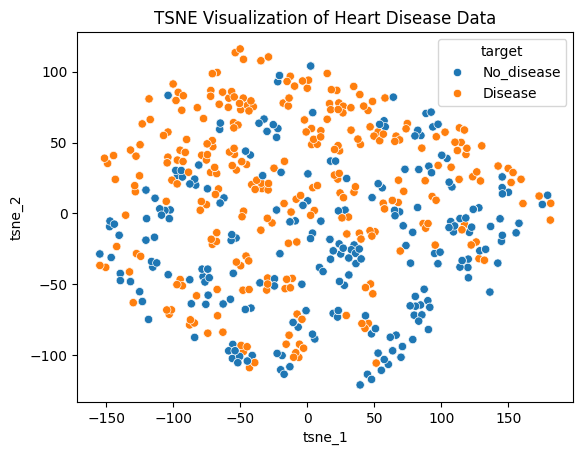

In [25]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

**Answers**
1. The pie chart shows approximately 54.5% of the samples are categorized as having heart disease.
2. The three continuous features with a significant statistical difference are:
Age
Cholesterol (chol)
Maximum Heart Rate Achieved (thalach)
These show clear differences in distributions between the presence and absence of heart disease.
3. PCA Plot Observation: There is no clear separation of the data into distinct clusters for disease and no-disease samples in the PCA plot. The overlap indicates that PCA alone may not be effective for this dataset.  
t-SNE Plot Observation: The t-SNE plot provides a slightly better separation than PCA. However, there is still some overlap between the two classes, suggesting limited discriminatory power for these features.
4. The cumulative explained variance reaches 95% with 7 components, indicating the optimal number of principal components is 7.
5. Oldpeak and Slope show a strong negative correlation.
Age and Trestbps (Resting Blood Pressure) also have a moderate positive correlation.

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [72]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded (1).csv


In [73]:
data = pd.read_csv("star_nutri_expanded.csv")

In [78]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0


cleaning and filling the missing values in the data

In [79]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [80]:
print(data.columns)


Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [81]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')


In [82]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [83]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [85]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [86]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [87]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [88]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [89]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [90]:

data = data.replace({True: 1, False: 0})


<ipython-input-90-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [91]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-91-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [92]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

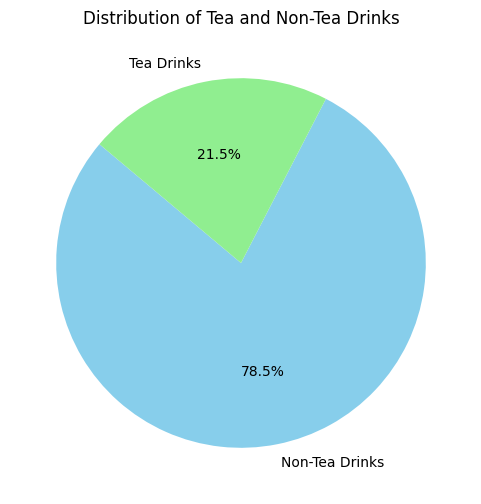

In [94]:
## to do
plt.figure(figsize=(6, 6))
data['Tea'].value_counts().plot(kind='pie', labels=['Non-Tea Drinks', 'Tea Drinks'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Distribution of Tea and Non-Tea Drinks')
plt.ylabel('')
plt.show()

# Create a pie chart of the 'Tea' column also write your observation form the plot



**Observations**  
The pie chart reveals that the Non-Tea Drinks section dominates, suggesting that Starbucks offers a significantly larger variety of non-tea beverages compared to tea options.
This dominance reflects a focus on coffee-based or other non-tea drinks, aligning with Starbucks' branding as a coffee-centric company.
Tea options, while present, represent a smaller portion of the menu and may cater to a niche audience or specific preferences.

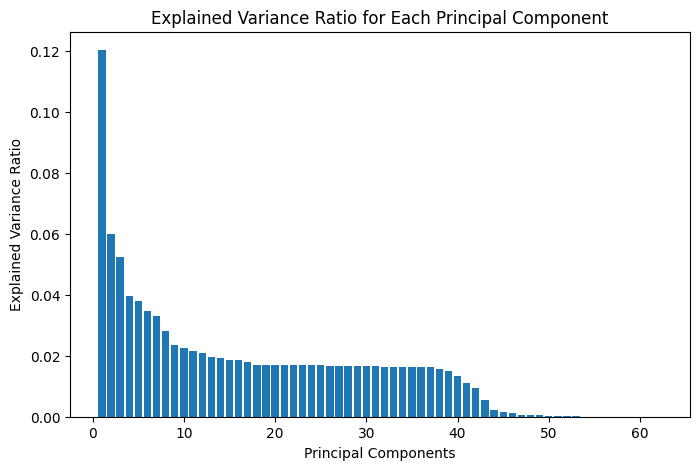

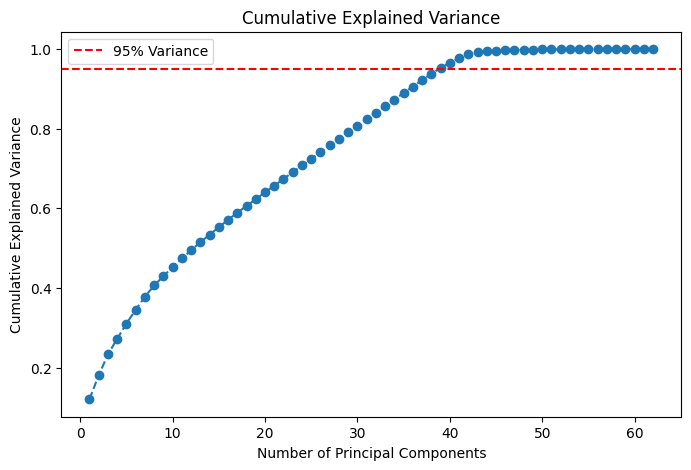

Optimal number of principal components: 39


In [100]:
## to do
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
df_numeric = data[numeric_columns]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
pca = PCA()
pca.fit(df_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

optimal_components = (cumulative_variance >= 0.95).argmax() + 1
print(f"Optimal number of principal components: {optimal_components}")

# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?


**Observation**
The optimal number of principal components is 39, as this captures 95% of the variance in the data.

Explained Variance Ratio: [1.20367445e-01 6.00944232e-02 5.23149791e-02 3.97031434e-02
 3.78957527e-02 3.47194217e-02 3.29055840e-02 2.82657724e-02
 2.34429806e-02 2.27053296e-02 2.17032979e-02 2.09463024e-02
 1.97021095e-02 1.92865459e-02 1.86323707e-02 1.85865823e-02
 1.78730828e-02 1.70311229e-02 1.69907461e-02 1.69745468e-02
 1.69657414e-02 1.69504229e-02 1.69261415e-02 1.68543263e-02
 1.68161387e-02 1.67890046e-02 1.67746357e-02 1.66504993e-02
 1.66100835e-02 1.65443742e-02 1.64890570e-02 1.64078113e-02
 1.63832376e-02 1.63355160e-02 1.63345071e-02 1.63208391e-02
 1.61995141e-02 1.57021936e-02 1.50463890e-02 1.32557337e-02
 1.11944111e-02 9.45947610e-03 5.51431064e-03 2.15517873e-03
 1.42215109e-03 1.11290731e-03 6.92916378e-04 5.65260077e-04
 4.12571872e-04 2.88010862e-04 2.34968161e-04 2.05796385e-04
 1.13930011e-04 6.69899963e-05 4.36044370e-05 1.57554988e-05
 4.05616617e-06 3.67618983e-33 2.24160887e-33 1.41892900e-33
 1.14594582e-33 8.95210657e-34]
Cumulative Explained Varian

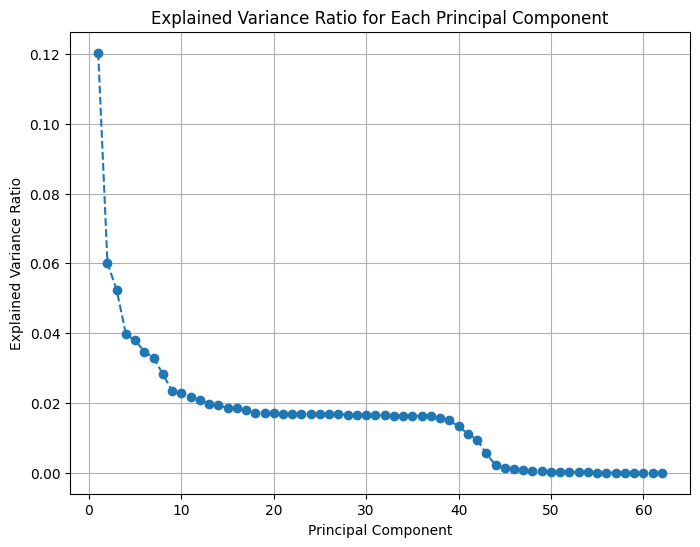

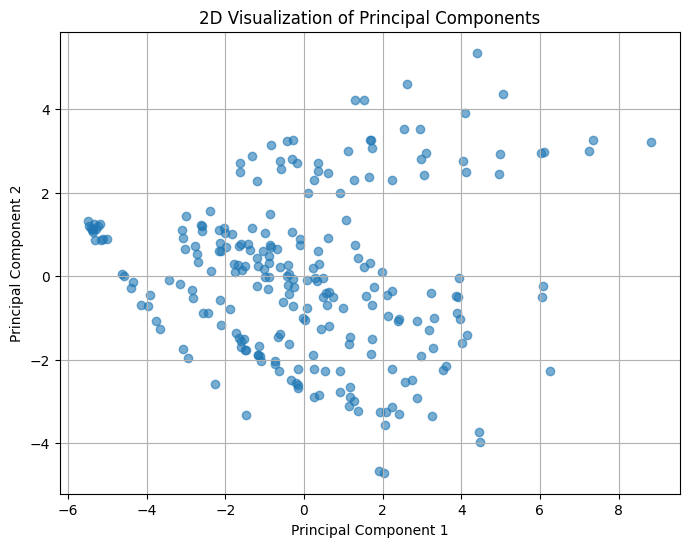

In [103]:
## to do
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
df_numeric = data[numeric_columns]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
pca = PCA()
pca.fit(df_scaled)
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
print(f'Cumulative Explained Variance: {pca.explained_variance_ratio_.cumsum()}')
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(df_scaled)
columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(principal_components, columns=columns)
if n_components == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.6)
    plt.title('2D Visualization of Principal Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?


**Observations**
The first two principal components show some separation between tea and non-tea drinks but the clustering is not very distinct.
This indicates that while PCA reduces dimensionality effectively it may not be sufficient to fully separate tea and non-tea categories.

In [106]:
data.columns = data.columns.str.strip()
print(data.columns)

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
       'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)',
       'Tea', 'bev_Banana Chocolate Smoothie', 'bev_Brewed Coffee',
       'bev_Caffè Americano', 'bev_Caffè Latte',
       'bev_Caffè Mocha (Without Whipped Cream)', 'bev_Cappuccino',
       'bev_Caramel', 'bev_Caramel (Without Whipped Cream)',
       'bev_Caramel Apple Spice (Without Whipped Cream)',
       'bev_Caramel Macchiato', 'bev_Coffee', 'bev_Espresso',
       'bev_Hot Chocolate (Without Whipped Cream)',
       'bev_Iced Brewed Coffee (With Classic Syrup)',
       'bev_Iced Brewed Coffee (With Milk & Classic Syrup)', 'bev_Java Chip',
       'bev_Java Chip (Without Whipped Cream)', 'bev_Mocha',
       'bev_Mocha (Without Whipped Cream)', 'bev_Orange Mango Banana Smoothie',
       'bev_

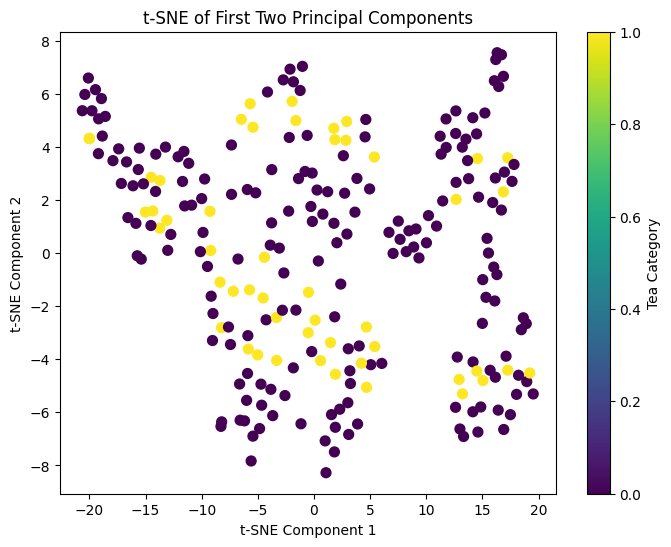

In [107]:
## to do
nutritional_columns = [
    'Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
    'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
    'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
    'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'
]
nutritional_data = data[nutritional_columns]
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
nutritional_data_scaled = scaler.fit_transform(nutritional_data)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(nutritional_data_scaled)

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['Tea'].astype('category').cat.codes, cmap='viridis', s=50)
plt.colorbar(label='Tea Category')
plt.title('t-SNE of First Two Principal Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# plot the first 2 components of tsne, whats you observation from the plot?


**Observations**
The t-SNE plot shows better separation compared to PCA with distinct groupings for tea and non-tea drinks.
This suggests that t-SNE captures non-linear relationships in the data more effectively than PCA.


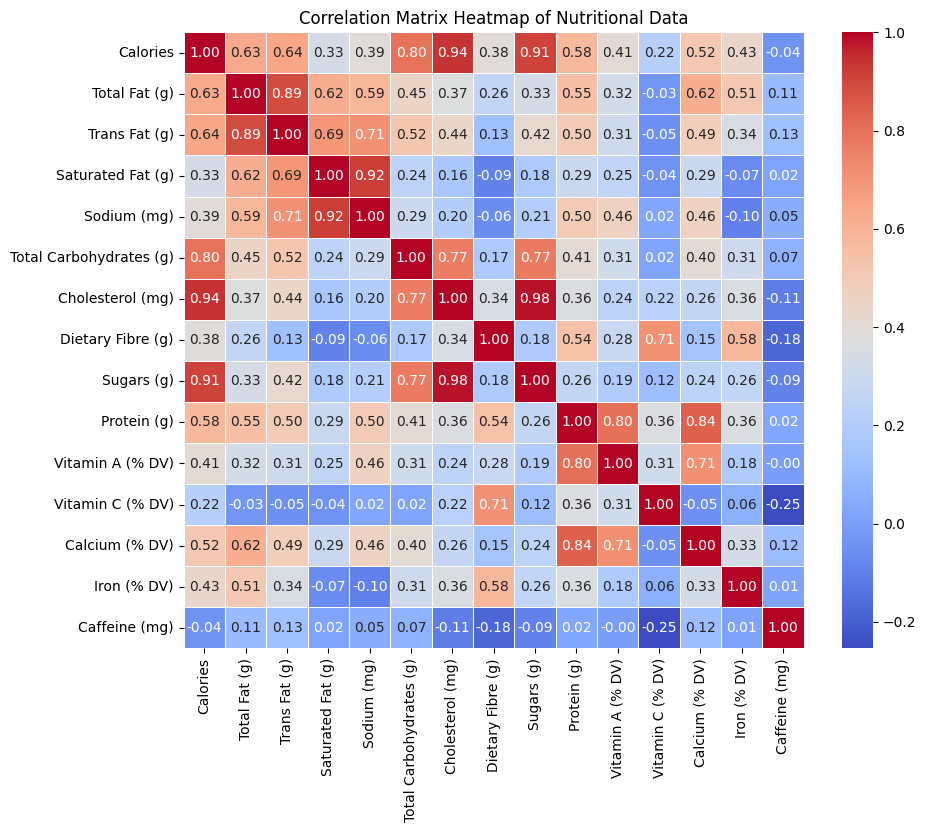

In [108]:
## to do
correlation_matrix = nutritional_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap of Nutritional Data')
plt.show()

# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


**Observations**
The heatmap highlights strong positive correlations between:
Calories and Total Carbohydrates
Total Fat and Saturated Fat
These correlations are intuitive since caloric content and fat content are generally interdependent in nutritional data.

<ipython-input-109-a30de4dd62a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_columns['Tea'] = data['Tea']


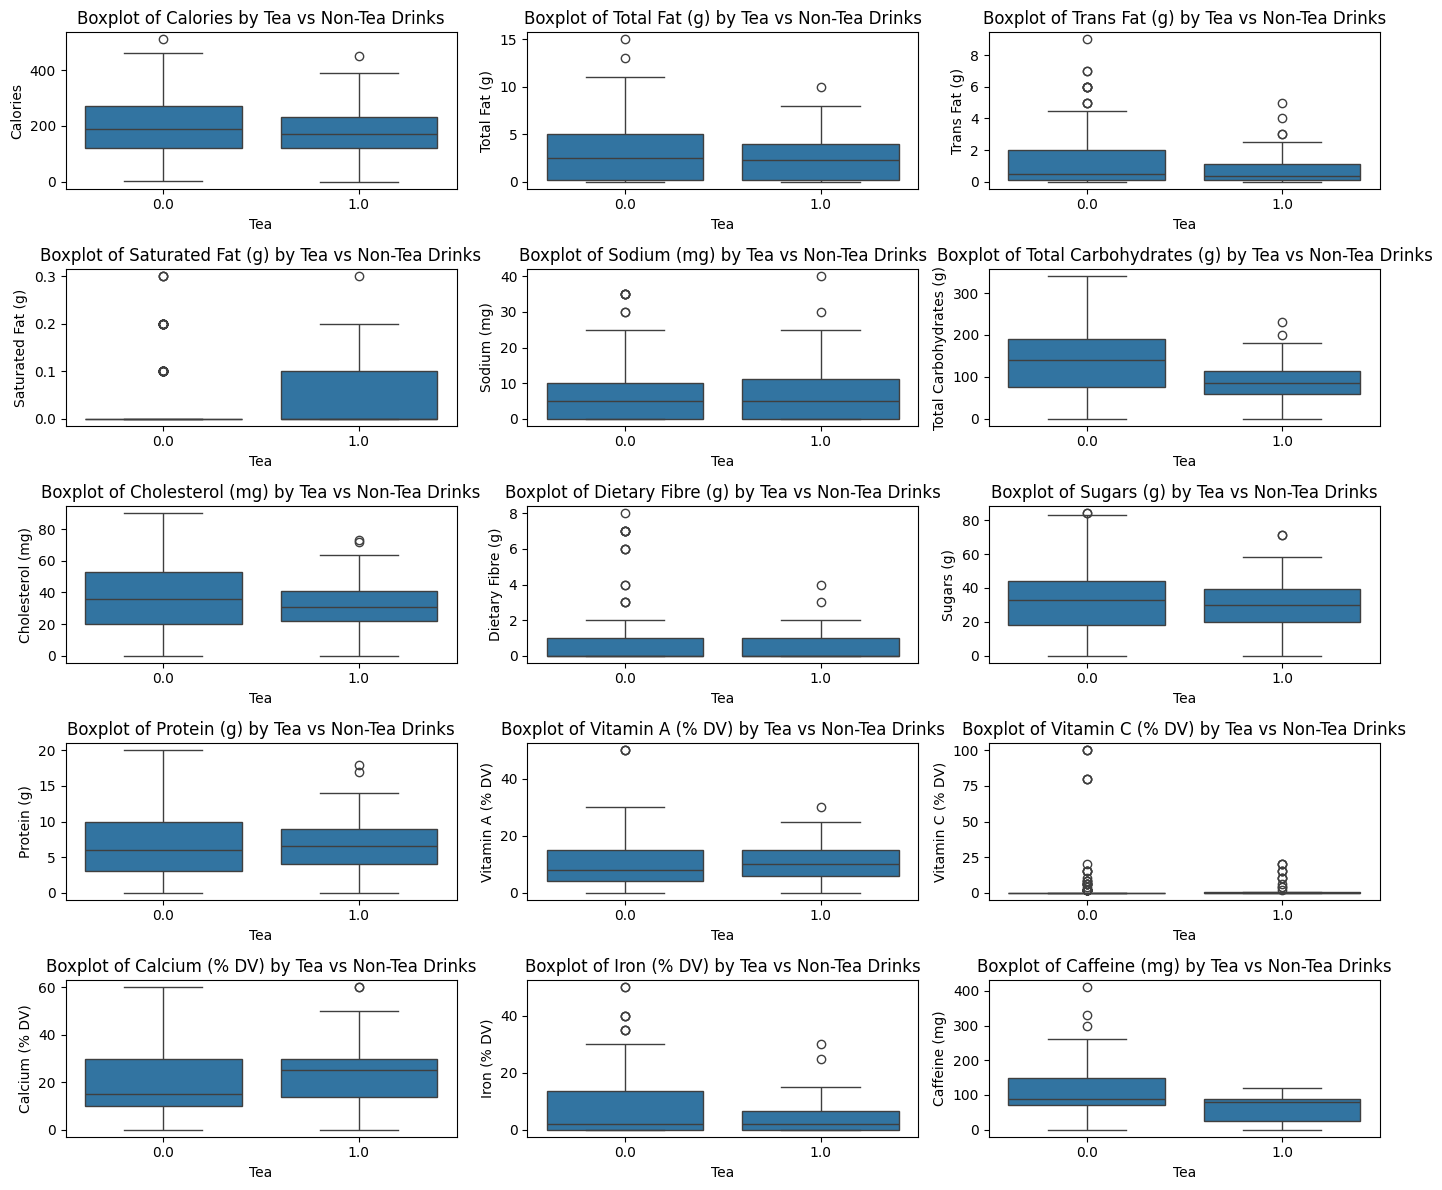

In [109]:
## to do
numeric_columns = data[['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)',
                        'Sodium (mg)', 'Total Carbohydrates (g)', 'Cholesterol (mg)',
                        'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
                        'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']]

numeric_columns['Tea'] = data['Tea']

plt.figure(figsize=(14, 12))

columns = ['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
           'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)', 'Sugars (g)',
           'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)',
           'Caffeine (mg)']

for i, column in enumerate(columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=numeric_columns, x='Tea', y=column)
    plt.title(f'Boxplot of {column} by Tea vs Non-Tea Drinks')

plt.tight_layout()
plt.show()
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?


**Observations**
Caffeine (mg) is a strong indicator. Tea drinks generally have lower caffeine content compared to coffee-based drinks.
Sugars (g) also varies significantly with tea drinks often containing higher sugar levels in some cases.

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.